In [ ]:
import webbrowser
import urllib.request
get_url= urllib.request.urlopen('https://forms.office.com/r/euKkudxfdK')
print(get_url.read())

b'\r\n\r\n<!DOCTYPE html>\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en-us">\r\n<head>\r\n    <meta charset="utf-8" />\r\n    <meta http-equiv="x-ua-compatible" content="IE=edge">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\r\n     \r\n    <title>\r\n        Microsoft Forms\r\n    </title>\r\n    <link rel="icon" href="https://cdn.forms.office.net/forms/images/favicon.ico" />\r\n    <script type="text/javascript">\r\nwindow.formsInitialVisibility = document.visibilityState;\r\ndocument.addEventListener("visibilitychange", function(){ window.formsVisibilityChange = true; });\r\n</script>\r\n\r\n    <script type="text/javascript">\r\n        window.NavKeyPoints = {\r\n            ServerGetPreviewTime: 0,\r\n            ServerPageTime: 5,\r\n            PageStartTime: Date.now(),\r\n        };\r\n    </script>\r\n    <script>\r\nfunction reloadNoCdn(){var n=location,o=n.search;0<o.length&&(o=o.substring(1));for(var t,e,r=o.split("&"),h=[],i=r

In [ ]:
year=input(("Enter the year : "))
mon=input(("Enter the month : "))
day=input(("Enter the days : "))

Enter the year : 2100
Enter the month : 12
Enter the days : 1


In [ ]:
y_p=dtr.predict([[year,mon,day]])
y_p

array([1.95])

In [ ]:
import pandas as pd
rd=pd.read_csv(r"/daily_csv.csv")
rd.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [ ]:
rd.tail()

,Date,Price
5933,2020-08-05,2.23
5934,2020-08-06,2.26
5935,2020-08-07,2.15
5936,2020-08-10,2.18
5937,2020-08-11,2.19


In [ ]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5938 non-null   object 
 1   Price   5937 non-null   float64
dtypes: float64(1), object(1)
memory usage: 92.9+ KB


In [ ]:
print(rd.size)

11876


In [ ]:
print(len(rd))

5938


In [ ]:
rd.dtypes

Date      object
Price    float64
dtype: object

In [ ]:
print(rd.values)

[['1997-01-07' 3.82]
 ['1997-01-08' 3.8]
 ['1997-01-09' 3.61]
 ...
 ['2020-08-07' 2.15]
 ['2020-08-10' 2.18]
 ['2020-08-11' 2.19]]


In [ ]:
print(rd.isnull().sum())

Date     0
Price    1
dtype: int64


In [ ]:
#finding outliers for each attributes
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
m=np.mean(rd['Price'])
print(" ")
print("mean of Price: ", m)
std=np.std(rd['Price'])
print("Satandard deviation of Price: ",std)
out=[]

 
mean of Price:  4.189230250968488
Satandard deviation of Price:  2.191025925698327


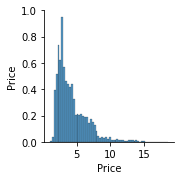

In [ ]:
sns.pairplot(rd)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x = rd.iloc[:, :-1].values
y = rd.iloc[:, -1].values
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.10, random_state=10)
from sklearn.tree import DecisionTreeClassifier
rd_model= DecisionTreeClassifier()
print(x_train)
print(y_train)
#rd_model.fit(x_train,y_train)
#rd_prediction= rd_model.predict(x_test)
#print("decision tree accuracy= ", accuracy_score(rd_prediction, y_test))

[['1998-01-16']
 ['2008-10-30']
 ['2006-12-27']
 ...
 ['2002-05-20']
 ['2015-06-23']
 ['2002-03-01']]
[2.11 6.75 5.54 ... 3.44 2.83 2.51]


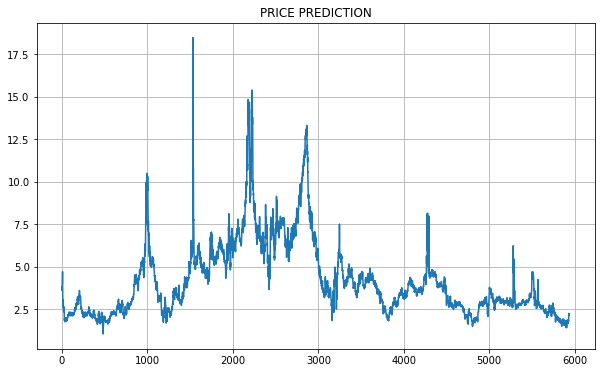

In [ ]:
import matplotlib.pyplot as plt
rd['Price'].plot(figsize=(10,6), grid=True)
plt.title('PRICE PREDICTION')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


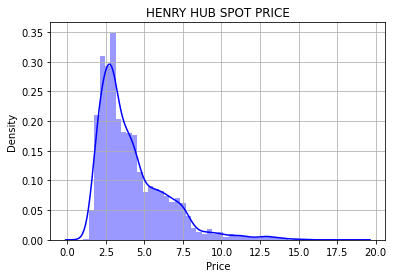

In [ ]:
#plotting histogram binsize determined automatically 
from scipy import stats
stats.jarque_bera(rd['Price'])
sns.distplot(rd['Price'],color='b')
plt.title('HENRY HUB SPOT PRICE')
plt.grid(True)
plt.show()

In [ ]:
rd['year'] = pd.DatetimeIndex(rd['Date']).year
rd['month'] = pd.DatetimeIndex(rd['Date']).month
rd['day'] = pd.DatetimeIndex(rd['Date']).day

In [ ]:
rd

,Date,Price,year,month,day
0,1997-01-07,3.82,1997,1,7
1,1997-01-08,3.80,1997,1,8
2,1997-01-09,3.61,1997,1,9
3,1997-01-10,3.92,1997,1,10
4,1997-01-13,4.00,1997,1,13
...,...,...,...,...,...
5933,2020-08-05,2.23,2020,8,5
5934,2020-08-06,2.26,2020,8,6
5935,2020-08-07,2.15,2020,8,7
5936,2020-08-10,2.18,2020,8,10


In [ ]:
rd.drop('Date',axis=1, inplace=True)

In [ ]:
rd.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

In [ ]:
rd.isnull().sum()

Price    1
year     0
month    0
day      0
dtype: int64

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')

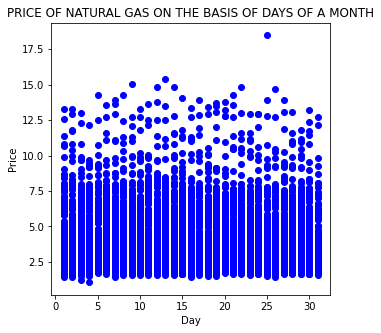

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(rd['day'],rd['Price'],color='blue')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

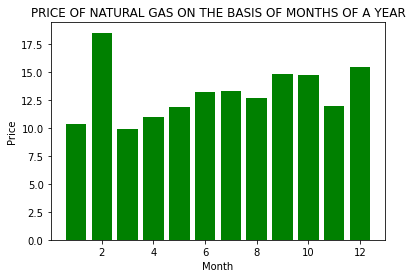

In [ ]:
plt.bar(rd['month'],rd['Price'],color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

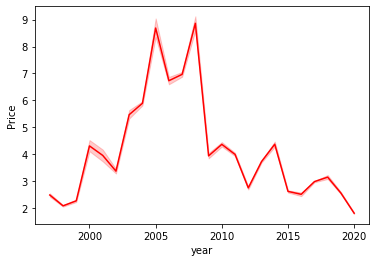

In [ ]:
import seaborn as sns
sns.lineplot(x='year',y='Price',data=rd,color='red')

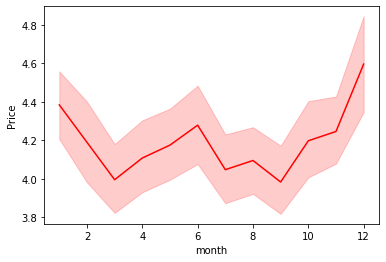

In [ ]:
sns.lineplot(x='month',y='Price',data=rd,color='red')

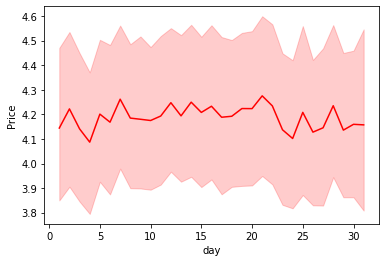

In [ ]:
sns.lineplot(x='day',y='Price',data=rd,color='red')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

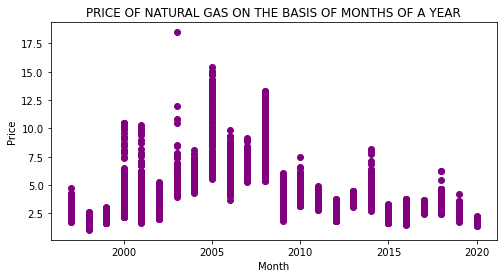

In [ ]:
fig=plt.figure(figsize=(8,4))
plt.scatter(rd['year'],rd['Price'],color='purple')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

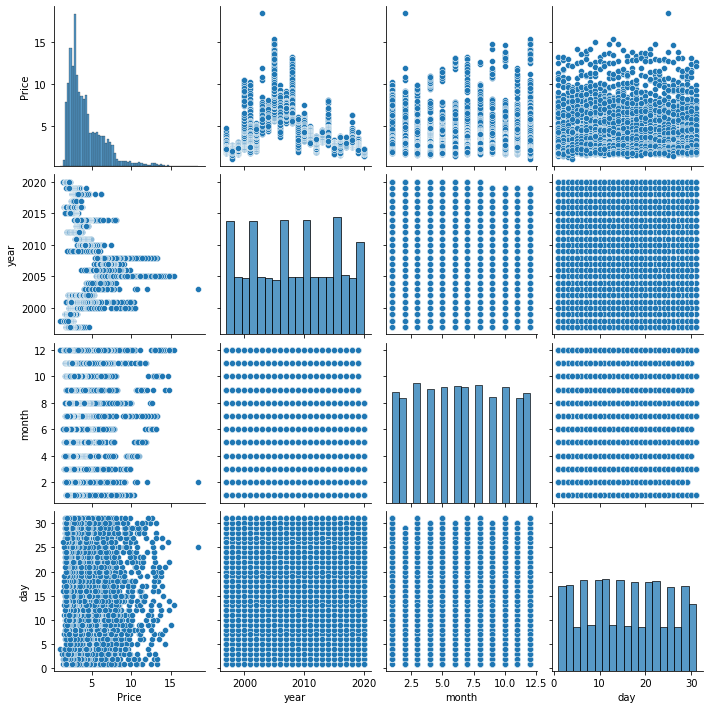

In [ ]:
sns.pairplot(rd)
plt.show()

In [ ]:
x=rd.iloc[:,1:4].values 
y=rd.iloc[:,0:1].values
x


array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,    7],
       [2020,    8,   10],
       [2020,    8,   11]])

In [ ]:
y

array([[3.82],
       [3.8 ],
       [3.61],
       ...,
       [2.15],
       [2.18],
       [2.19]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(4750, 3)

In [ ]:
y_train.shape

(4750, 1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
import numpy as np
x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
y_train[np.isnan(y_train)] = np.median(y_train[~np.isnan(y_train)])
#x_pred[np.isnan(x_pred)] = np.median(x_pred[~np.isnan(x_pred)])
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
y_pred

array([3.43, 3.  , 8.24, ..., 2.16, 3.91, 4.35])

In [ ]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
print(accuracy)
acc_precent= accuracy*100
print(acc_precent,"%")

0.9722542671268342
97.22542671268342 %


In [ ]:
y_p=dtr.predict([[year,mon,day]])
y_p

NameError: ignored